# Lab 6: Poverty

This optional set of questions exploring world poverty is provided to give you more practice and experience if you want it. This section is *not* required and will not count toward your course progress.

First, set up the tests and imports by running the cell below.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from gofer.ok import check

## 3. Global Poverty

In 1800, 85% of the world's 1 billion people lived in *extreme poverty*, defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." A common measure of extreme poverty is a person living on less than \$1.25 per day.

In 2018, the proportion of people living in extreme poverty was estimated to be 8%. Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations recently adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."
In this section, we will examine extreme poverty trends around the world.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [2]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


**Question 3.1.** <br/>Assign `latest` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the *most recent year* for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: think about how ```group``` works: it does a sequential search of the table (from top to bottom) and collects values in the array in the order in which they appear, and then applies a function to that array. The `first` function may be helpful, but you are not required to use it.

In [3]:
def first(values):
    return values.item(0)

latest = poverty.sort("time", descending=True).group("geo", first)
latest.relabel(0, 'geo').relabel(1, 'time').relabel(2, 'poverty_percent') # You should *not* change this line.

geo,time,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


In [4]:
check('tests/q3_1.py')

**Question 3.2.** <br/>Using both `latest` and `population`, create a four-column table called `recent` with one row for each country in `latest`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

In [5]:
population_total = population.where("time", are.equal_to(2010)).drop("time")
poverty_and_pop = latest.drop("time").join("geo", population_total)

poverty_total = np.round(poverty_and_pop.column("poverty_percent") * poverty_and_pop.column("population_total") / 100)
recent = poverty_and_pop.with_column("poverty_total", poverty_total)
recent

geo,poverty_percent,population_total,poverty_total
ago,43.37,21219954,9.20309e+06
alb,0.46,2901883,13349
arg,1.41,41222875,581243
arm,1.75,2963496,51861
aus,1.36,22162863,301415
aut,0.34,8391986,28533
aze,0.31,9099893,28210
bdi,81.32,9461117,7.69378e+06
bel,0.5,10929978,54650
ben,51.61,9509798,4.90801e+06


In [6]:
check('tests/q3_2.py')

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [7]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
akr_a_dhe,Akrotiri and Dhekelia,europe,nan,nan
alb,Albania,europe,41,20
dza,Algeria,africa,28,3
asm,American Samoa,asia,-11.056,-171.082
and,Andorra,europe,42.5078,1.52109
ago,Angola,africa,-12.5,18.5
aia,Anguilla,americas,18.2167,-63.05
atg,Antigua and Barbuda,americas,17.05,-61.8
arg,Argentina,americas,-34,-64


**Question 3.3.** <br/>Using both `countries` and `recent`, create a five-column table called `poverty_map` with one row for every country in `recent`.  The four columns should have the following labels and contents:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.

In [8]:
# countries
poverty_map = countries.join("country", recent, "geo").select("latitude", "longitude", "name", "world_4region", "poverty_total")
poverty_map.relabel(3, "region")
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,9.20309e+06
41,20,Albania,europe,13349
-34,-64,Argentina,americas,581243
40.25,45,Armenia,europe,51861
-25,135,Australia,asia,301415
47.3333,13.3333,Austria,europe,28533
40.5,47.5,Azerbaijan,europe,28210
-3.5,30,Burundi,africa,7.69378e+06
50.75,4.5,Belgium,europe,54650
9.5,2.25,Benin,africa,4.90801e+06


In [9]:
check('tests/q3_3.py')

Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [10]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'poverty_total', poverty_map.column('poverty_total') / 2e6,
    'region', poverty_map.apply(colors.get, 'region')
)
scaled.relabel('region', 'color')
scaled.relabel('poverty_total', 'radius')
Circle.map_table(scaled)

Although people live in extreme poverty throughout the world (with more than 5 million in the United States), the largest numbers are in Asia and Africa.

**Question 3.4.** <br/>Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

In [11]:
largest = poverty_map.sort("poverty_total", descending=True).select("name", "poverty_total").take[:10]
largest

name,poverty_total
India,2.90882e+08
Nigeria,9.88912e+07
China,8.39446e+07
Bangladesh,6.55743e+07
"Congo, Dem. Rep.",5.78414e+07
Indonesia,3.91413e+07
Ethiopia,3.2214e+07
Pakistan,2.16636e+07
Tanzania,1.9848e+07
Madagascar,1.84804e+07


In [12]:
check('tests/q3_4.py')

**Question 3.5.** <br/>Use the function called `poverty_timeline` that takes **the name of a country** as its argument. It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. Do you understand the code in the two functions? 

Finally, draw the timelines below to see how the world is changing. You can check your work by comparing your graphs to the ones on [gapminder.org](https://goo.gl/lPujuh).

In [13]:
def population_for_country_in_year(row_of_poverty_table):
    """Optional: Define a function to return the population 
    of a country in a year using a row from the poverty table."""
    return population.where('time', row_of_poverty_table.item('time')).where('geo', row_of_poverty_table.item('geo')).column('population_total').item(0)

def poverty_timeline(country):
    """Draw a timeline of people living in extreme poverty in a country."""
    geo = countries.where('name', country).column('country').item(0)
    country_poverty = poverty.where('geo', geo)
    Table().with_columns('Year', country_poverty.column(1), 'Number in poverty', country_poverty.column(2) / 100 * country_poverty.apply(population_for_country_in_year)).plot(0, 1)

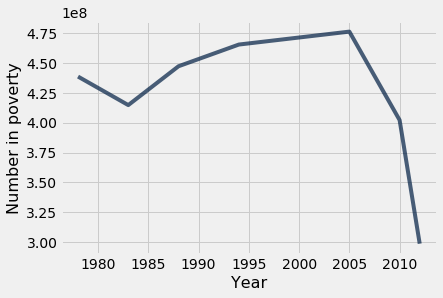

In [14]:
poverty_timeline('India')

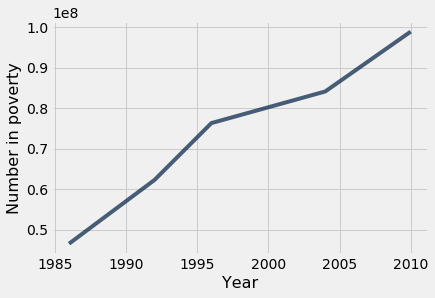

In [15]:
poverty_timeline('Nigeria') 

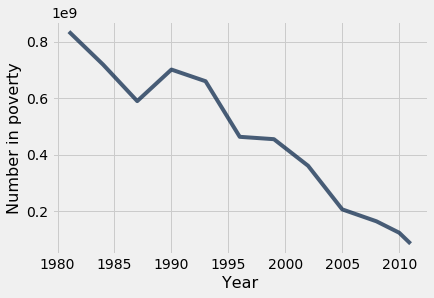

In [16]:
# Draw the poverty timeline for China
poverty_timeline('China') 

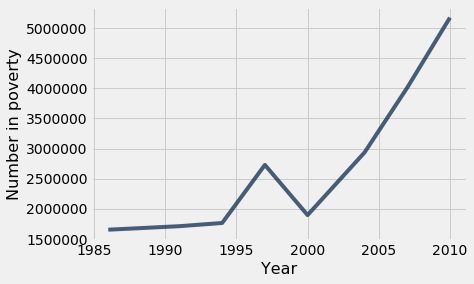

In [17]:
# Draw the poverty timeline for the United States
poverty_timeline("United States")

Although the number of people living in extreme poverty has been increasing in Nigeria and the United States, the massive decreases in China and India have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

Below, we've also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. After selecting a new country, it will take a few seconds for the chart to update.

In [18]:
# Just run this cell

all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

interactive(children=(Dropdown(description='country', options=('Angola', 'Albania', 'Argentina', 'Armenia', 'A…

## Submission

There is no way to submit this optional lab, but you are welcome to check your work with the cell below.

In [19]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import check_all
display(check_all(glob.glob('tests/q*.py')))

Question 1:


Question 2:


Question 3:


Question 4:


1.0